# Identifying Covid-19 epidemic episosodes and outbreaks in municipal time series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from detecta import detect_onset
import numpy as np
import seaborn as sns

## Loading data

In [2]:
df_ts_sample = pd.read_csv('../data/df_municipal_epidemic_parameters_sample.csv', index_col=0)
df_ts_sample.DATA = pd.to_datetime(df_ts_sample.DATA, infer_datetime_format=True)

In [3]:
df_ts_sample = df_ts_sample.sort_values(['DATA'])

In [4]:
df_ts_sample.columns

Index(['DATA', 'CODIGO_MUNICIPIO_6', 'NOVOS_CASOS_SRAG', 'OBITOS_NOVOS',
       'OBITOS', 'OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS', 'TAXA_OBITOS_NOVOS',
       'TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS', 'TAXA_OBITOS', 'casosNovos',
       'casosAcumulado', 'CASOS_NOVOS_MEDIA_MOVEL_7_DIAS', 'MUNICIPIO',
       'SIGLA_ESTADO', 'ESTADO', 'REGIAO', 'POPULACAO_2022',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_VARIANCIA',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_QUANTIL_0.025',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIANA',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_QUANTIL_0.975',
       'NUMERO_REPRODUCAO_EFETIVO_MEDIA',
       'NUMERO_REPRODUCAO_EFETIVO_VARIANCIA',
       'NUMERO_REPRODUCAO_EFETIVO_QUANTIL_0.025',
       'NUMERO_REPRODUCAO_EFETIVO_MEDIANA',
       'NUMERO_REPRODUCAO_EFETIVO_QUANTIL_0.975',
       'NUMERO_REPRODUCAO_EFETIVO_ATRASADO_MEDIA',
       'NUMERO_REPRODUCAO_EFETIVO_ATRASADO_VARIANCIA',
       'NUMERO_REPRODUCAO_EFETIVO_ATRASADO_QUANTIL

## Identifying epidemic episodes

In [5]:
factor_threshold = {1:2}

In [6]:
type(factor_threshold) == dict

True

In [7]:
def detect_onset_deaths(death_series, onset_rt, ignore_end_of_outbreak=None, factor_threshold=1):
    onset_deaths = np.empty((0, 2))
    
    plt.figure(figsize=(7.5, 4.5))
    plt.plot(death_series)
    
    factor_threshold_default = 1
    
    for i in range(len(onset_rt)):
        onset_rt_begin = onset_rt[i][0]
        onset_rt_end = onset_rt[i][1]
        
        if type(factor_threshold) == dict:
            try:
                factor_threshold_temp = factor_threshold[i]
            except:
                factor_threshold_temp = factor_threshold_default
        else:
            factor_threshold_temp = factor_threshold
            
        if (ignore_end_of_outbreak == i):                                                    
            death_threshold = np.mean(death_series[onset_rt_begin: onset_rt[ignore_end_of_outbreak+1][1]]) * factor_threshold_temp
        else:           
            death_threshold = np.mean(death_series[onset_rt_begin: onset_rt_end]) * factor_threshold_temp   
                
        for onset_deaths_end in range(onset_rt_end+1,len(death_series)):
            # if death_series[onset_deaths_end] <= death_threshold:
            below_or_equals_threshold = True
            for j in range(5):
                if (onset_deaths_end+j < len(death_series)) and (death_series[onset_deaths_end+j] > death_threshold):
                    below_or_equals_threshold = False
            if below_or_equals_threshold:
                break            
        
        onset_deaths = np.append(onset_deaths, np.array([[onset_rt_end, onset_deaths_end]]), axis=0)
        
        plt.axvspan(onset_rt_end, onset_deaths_end, color='red', alpha=0.25, label='Onset Period')
        plt.axvline(x=onset_rt_begin,color='green')        
        plt.axvline(x=onset_rt_end,color='blue')

        plt.scatter(x=onset_rt_end, y=death_threshold, color='black')

    plt.tight_layout()
    plt.show()

    return onset_deaths            

### Municipalities

In [8]:
df_ts_sample.columns

Index(['DATA', 'CODIGO_MUNICIPIO_6', 'NOVOS_CASOS_SRAG', 'OBITOS_NOVOS',
       'OBITOS', 'OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS', 'TAXA_OBITOS_NOVOS',
       'TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS', 'TAXA_OBITOS', 'casosNovos',
       'casosAcumulado', 'CASOS_NOVOS_MEDIA_MOVEL_7_DIAS', 'MUNICIPIO',
       'SIGLA_ESTADO', 'ESTADO', 'REGIAO', 'POPULACAO_2022',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_VARIANCIA',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_QUANTIL_0.025',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIANA',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_QUANTIL_0.975',
       'NUMERO_REPRODUCAO_EFETIVO_MEDIA',
       'NUMERO_REPRODUCAO_EFETIVO_VARIANCIA',
       'NUMERO_REPRODUCAO_EFETIVO_QUANTIL_0.025',
       'NUMERO_REPRODUCAO_EFETIVO_MEDIANA',
       'NUMERO_REPRODUCAO_EFETIVO_QUANTIL_0.975',
       'NUMERO_REPRODUCAO_EFETIVO_ATRASADO_MEDIA',
       'NUMERO_REPRODUCAO_EFETIVO_ATRASADO_VARIANCIA',
       'NUMERO_REPRODUCAO_EFETIVO_ATRASADO_QUANTIL

Manaus


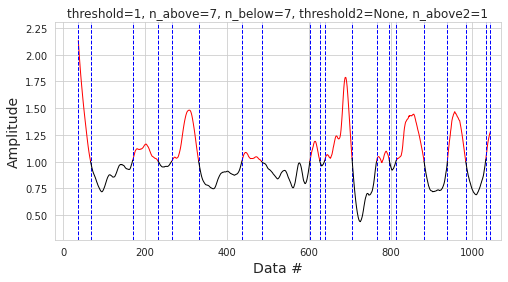

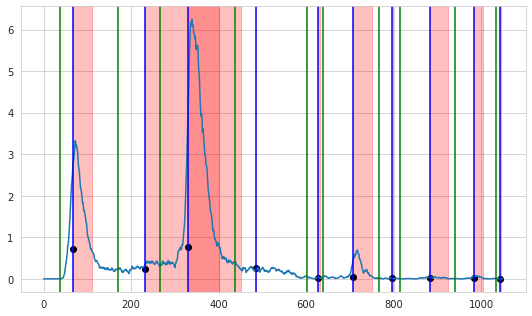

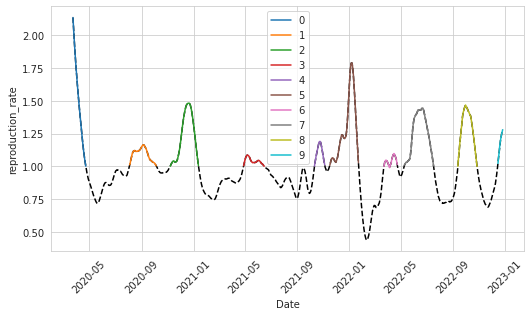

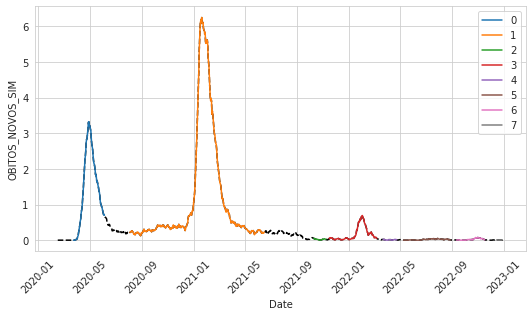

Salvador


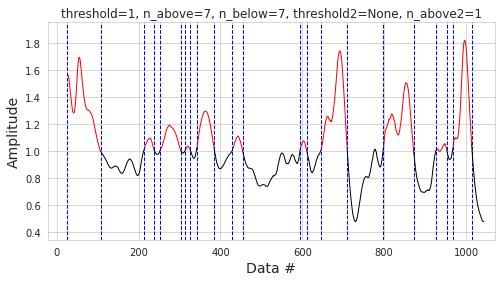

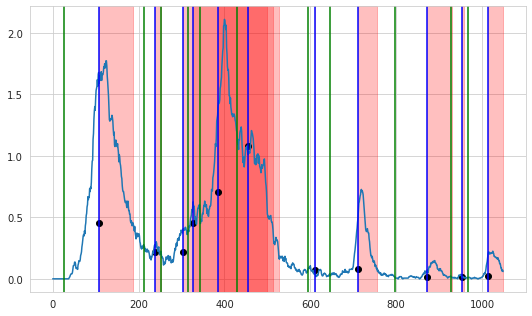

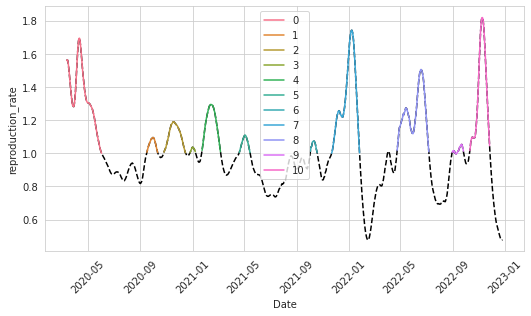

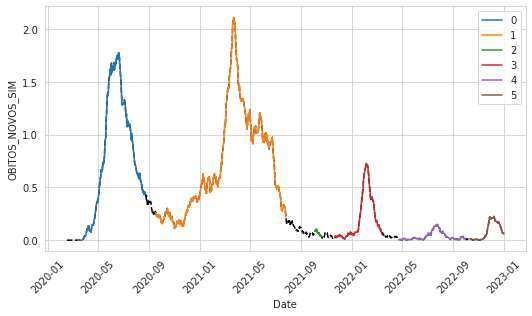

Sorocaba


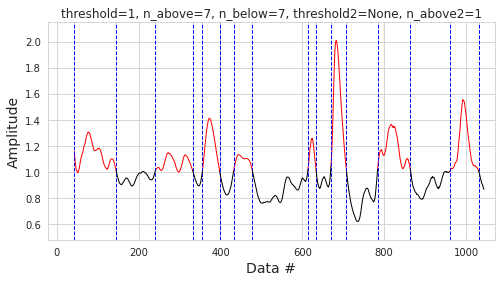

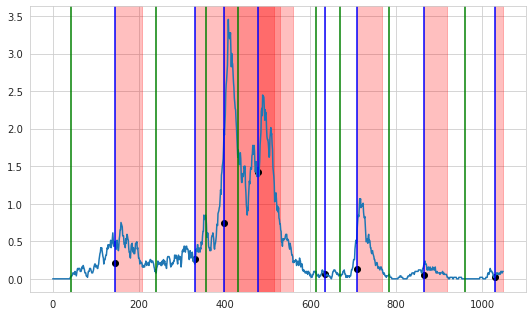

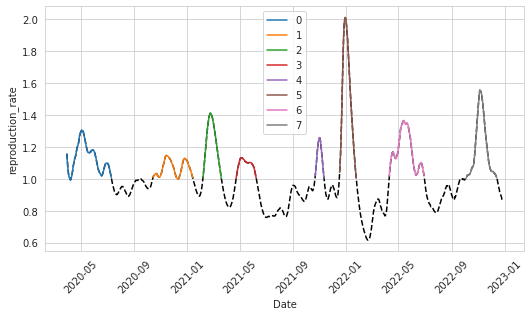

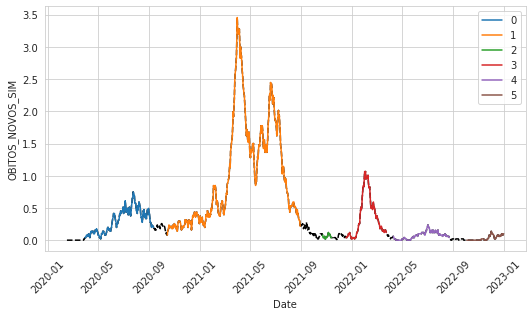

Teresina


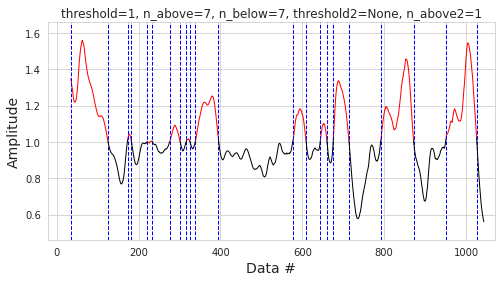

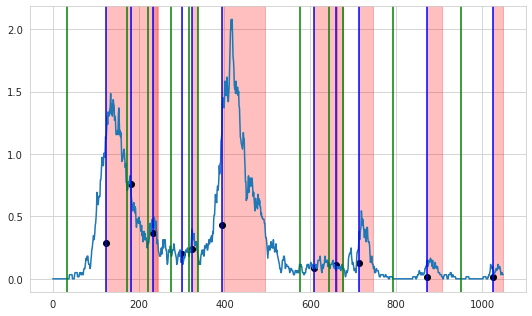

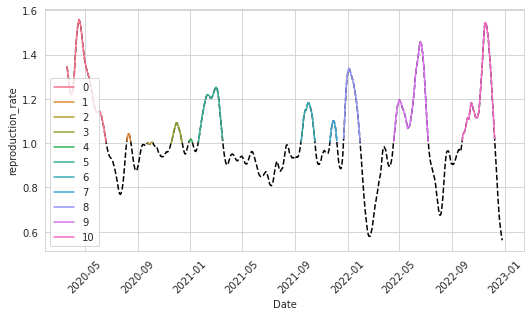

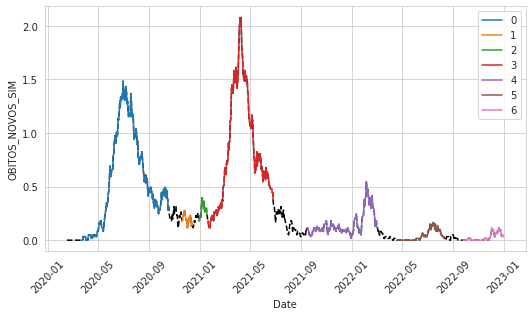

Aparecida de Goiânia


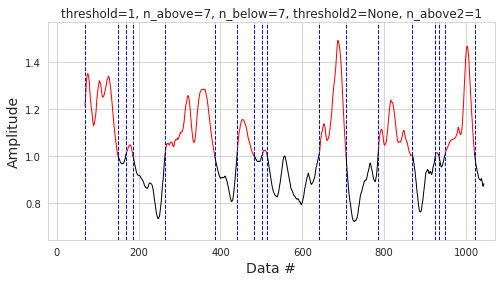

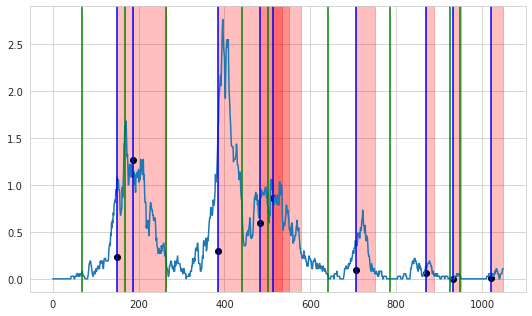

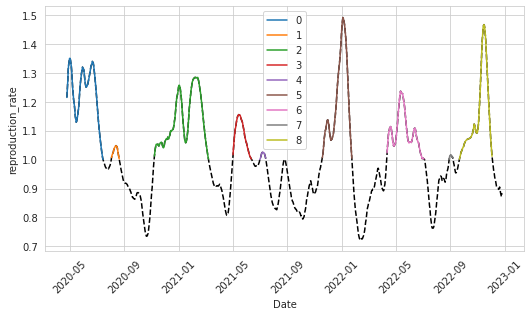

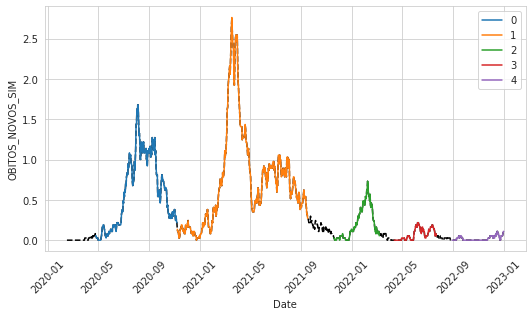

Florianópolis


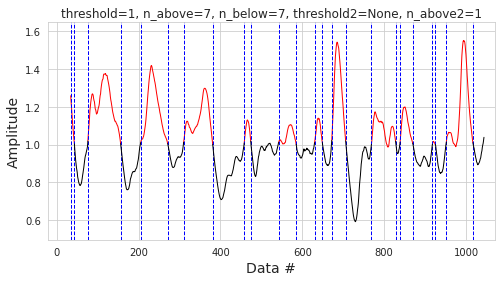

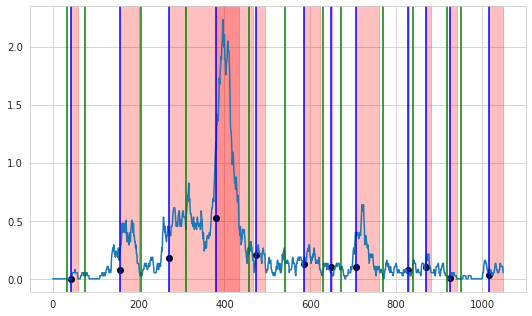

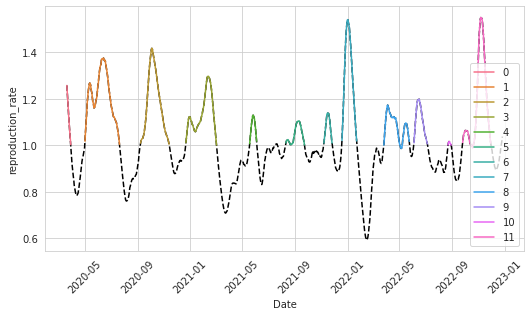

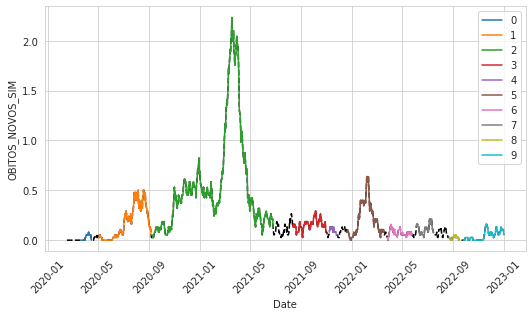

Recife


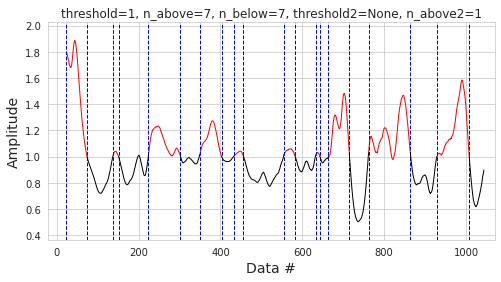

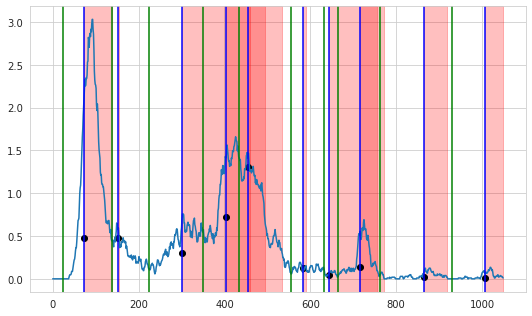

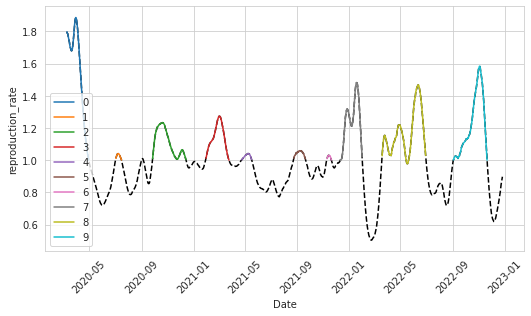

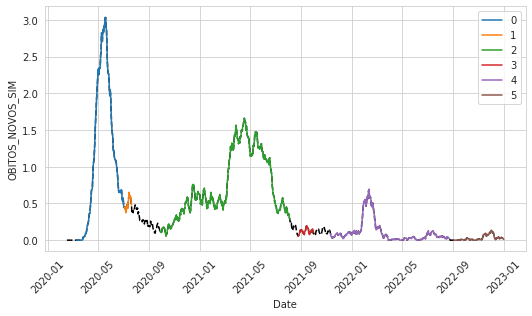

Campinas


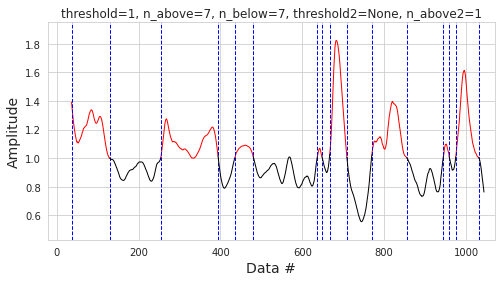

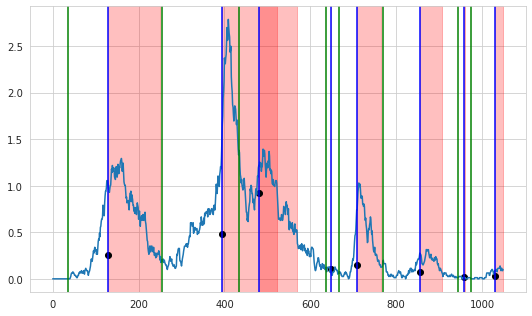

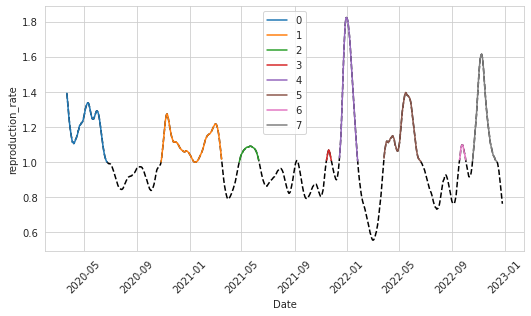

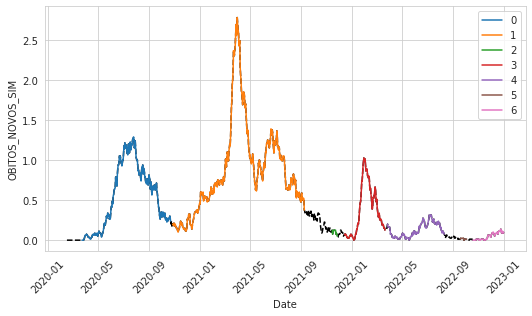

Nova Iguaçu


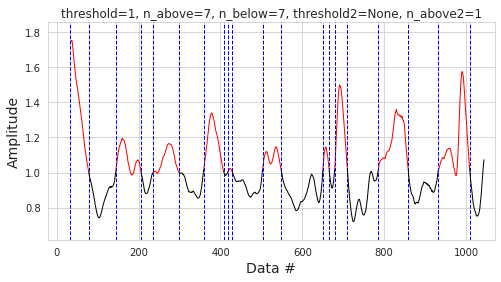

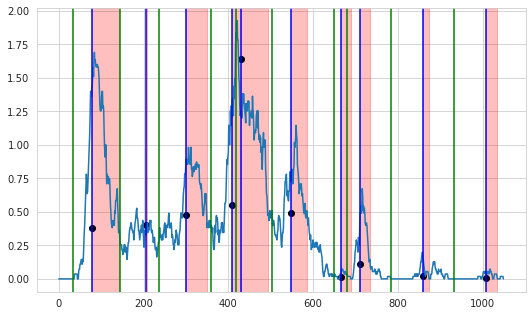

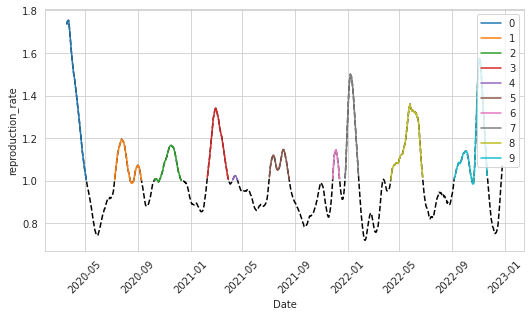

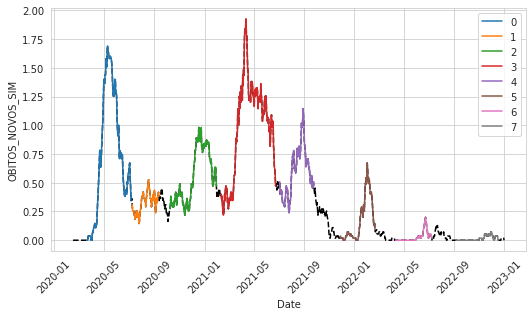

Contagem


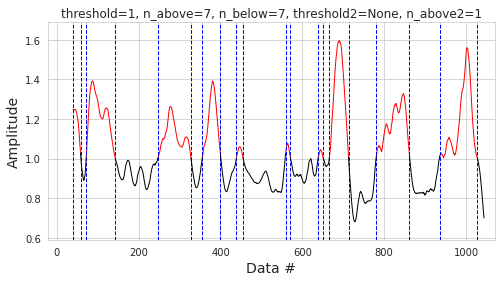

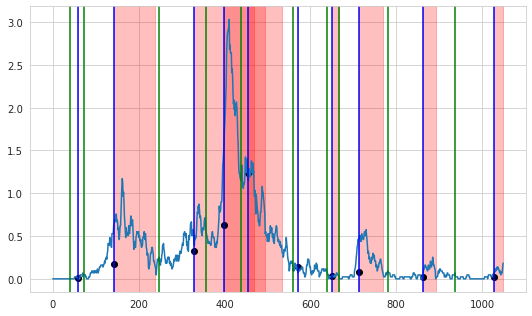

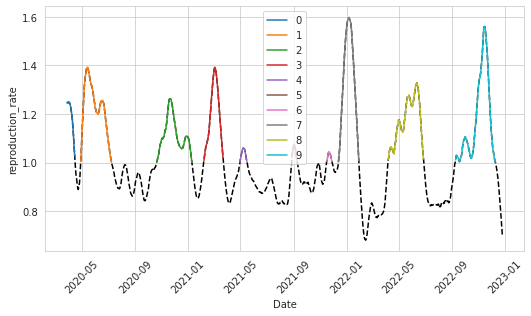

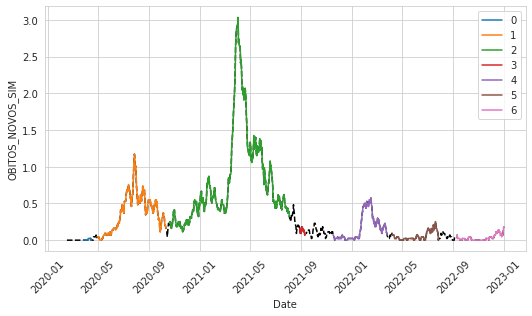

São Bernardo do Campo


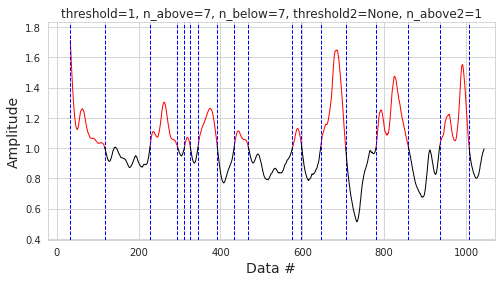

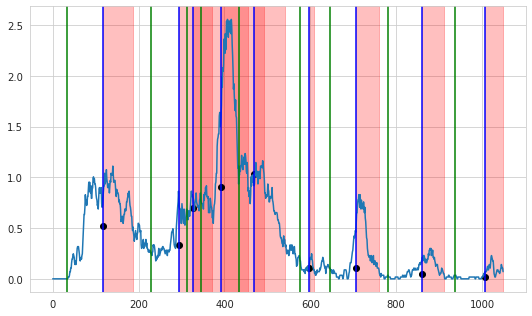

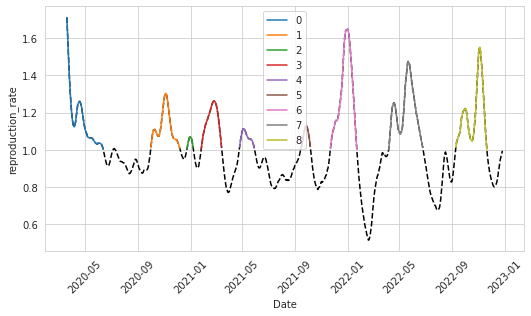

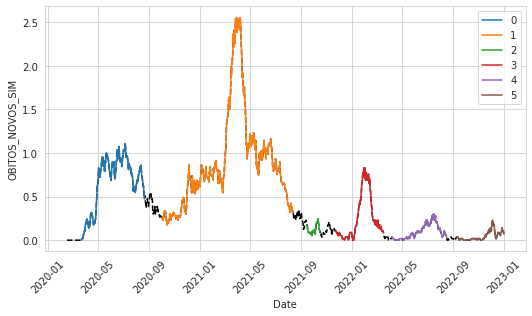

Uberlândia


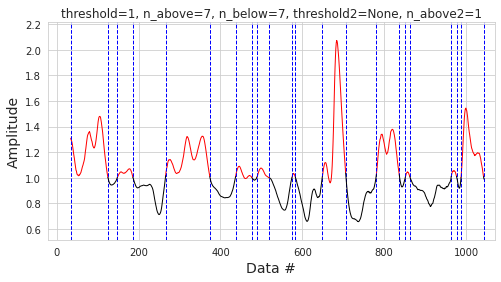

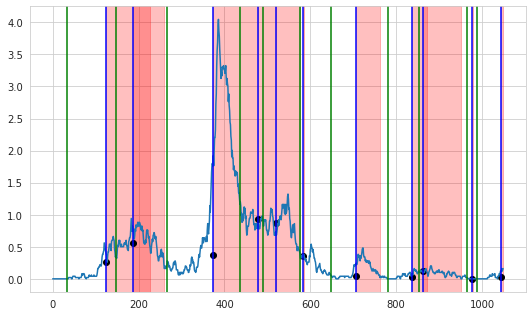

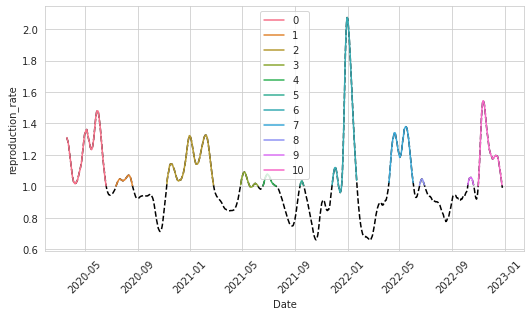

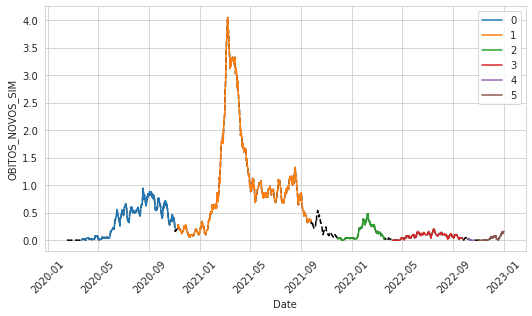

Ribeirão Preto


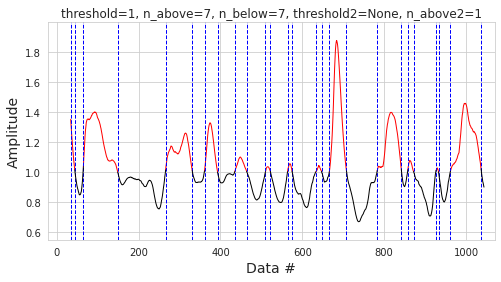

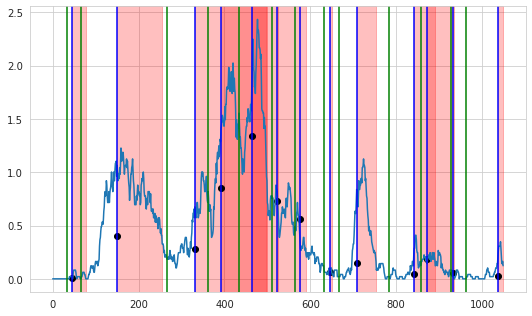

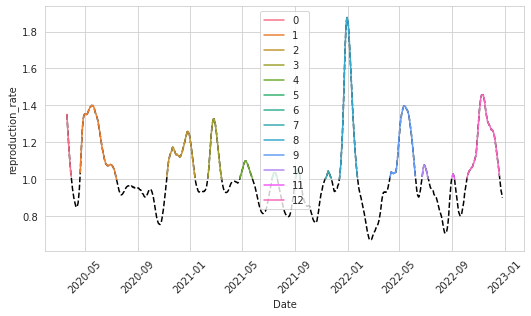

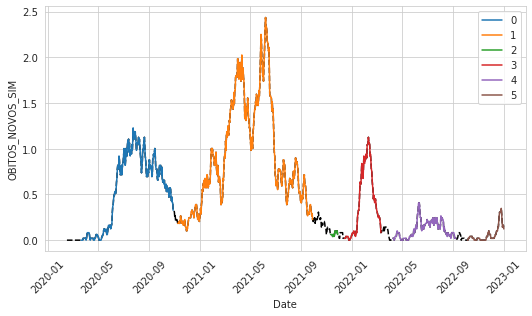

Natal


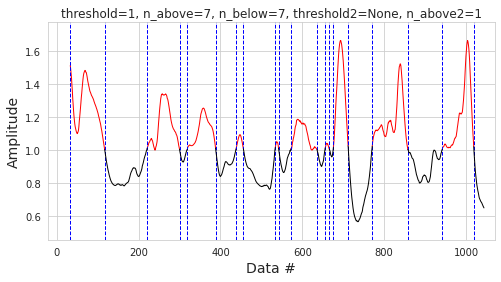

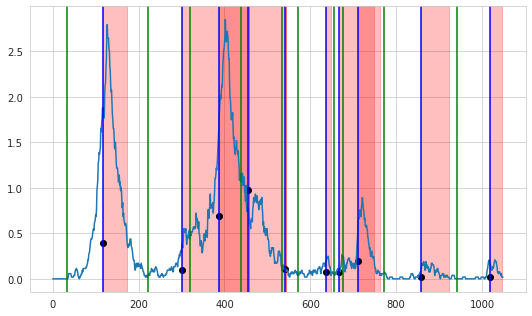

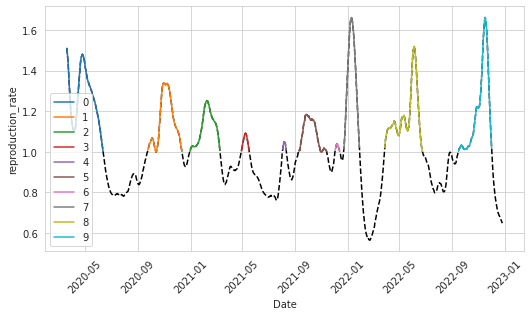

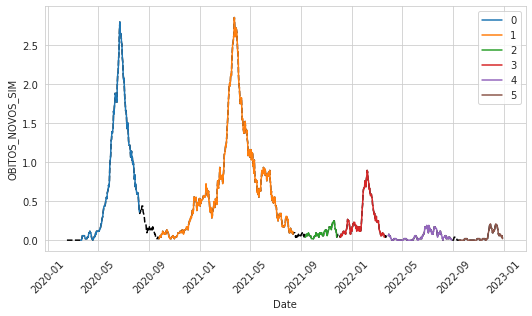

Campo Grande


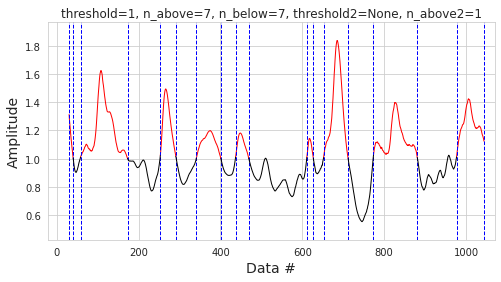

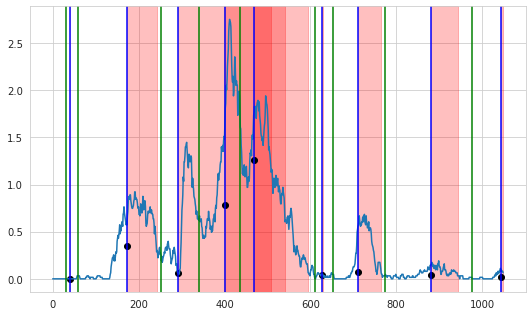

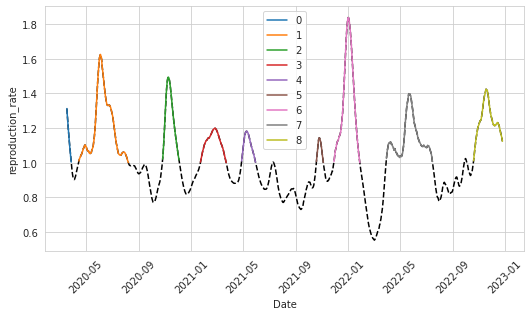

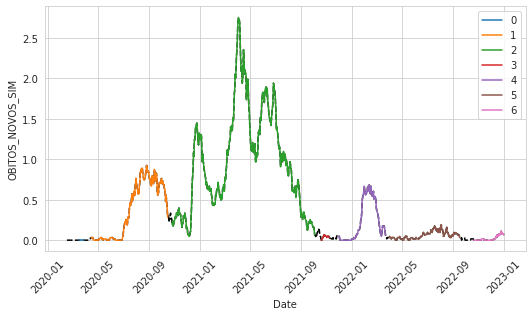

Goiânia


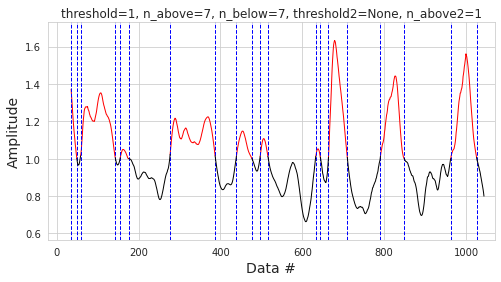

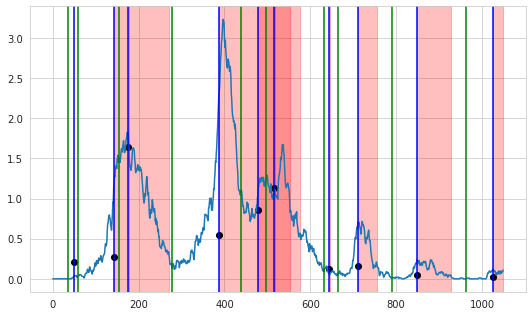

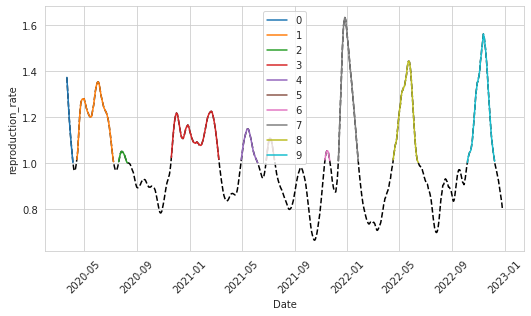

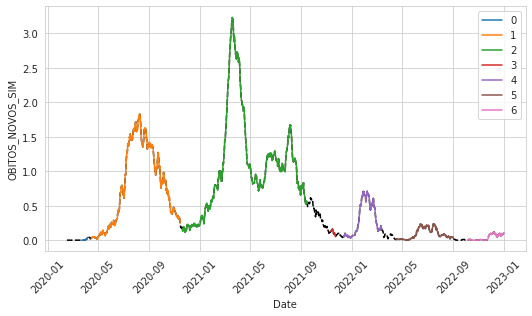

São Luís


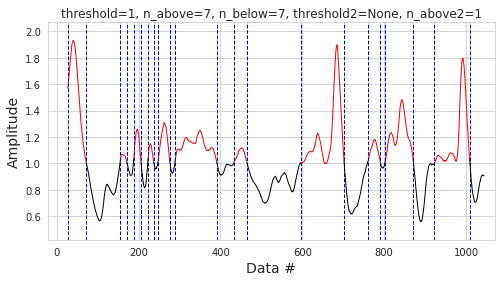

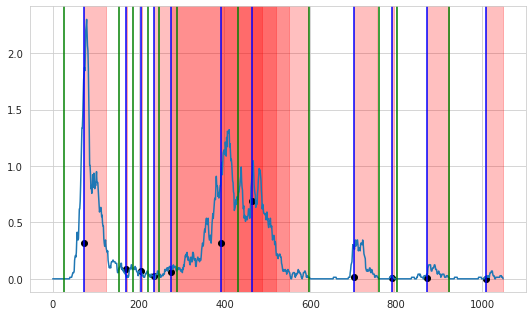

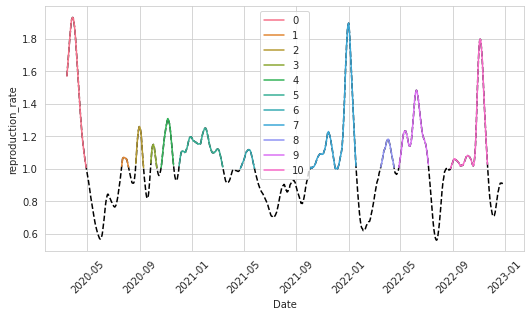

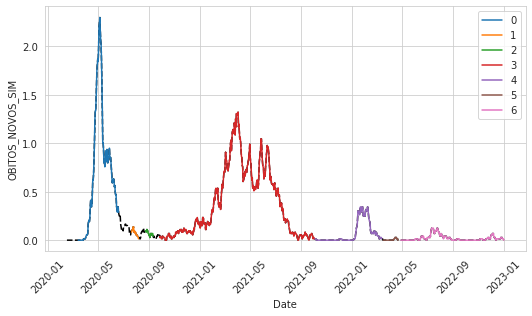

Aracaju


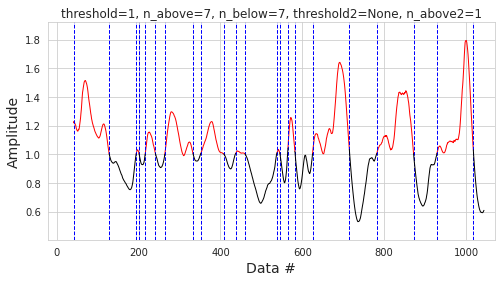

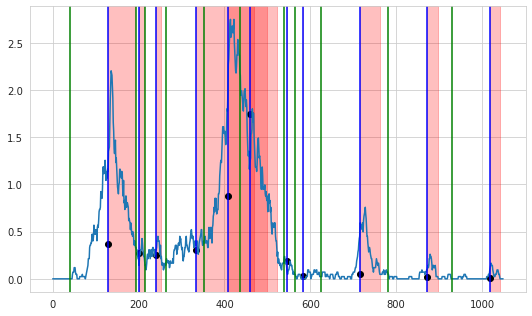

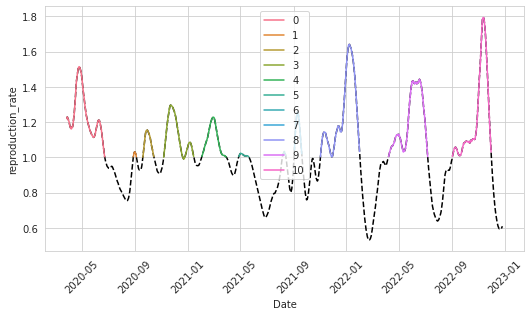

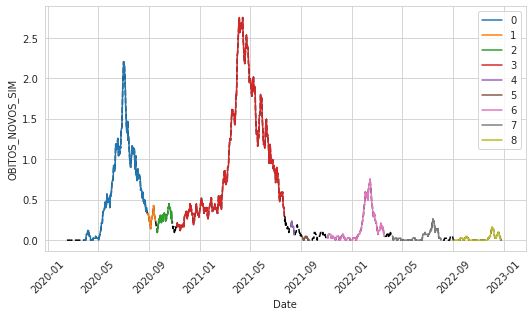

Curitiba


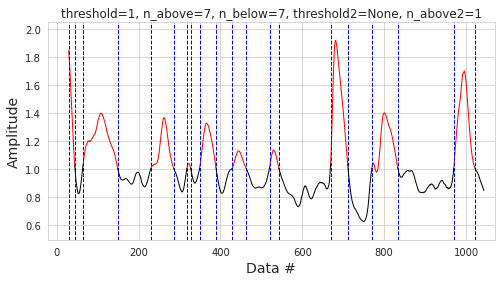

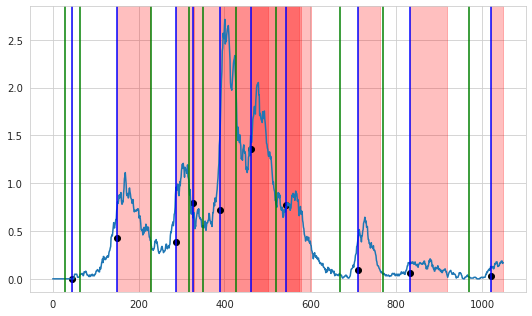

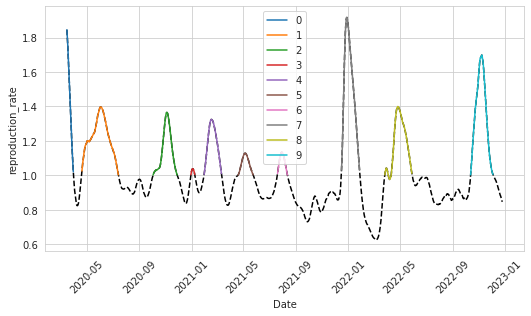

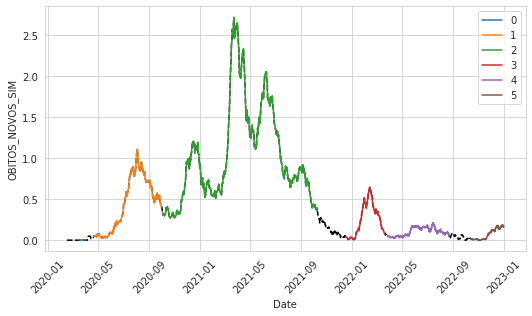

Duque de Caxias


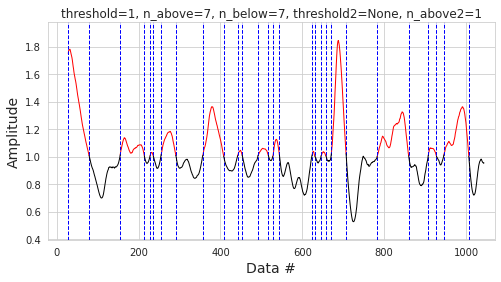

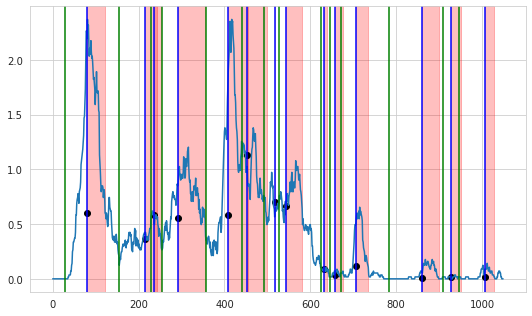

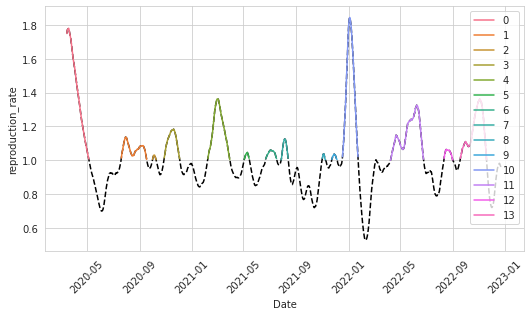

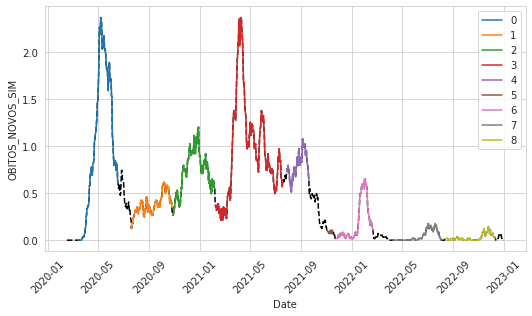

Feira de Santana


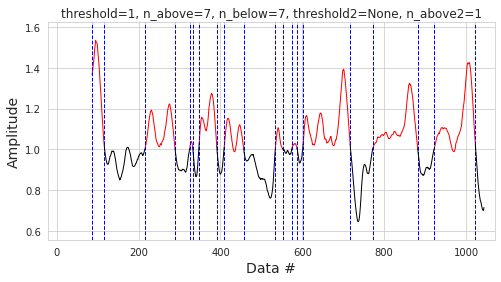

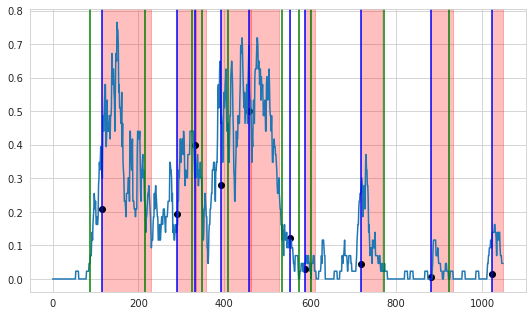

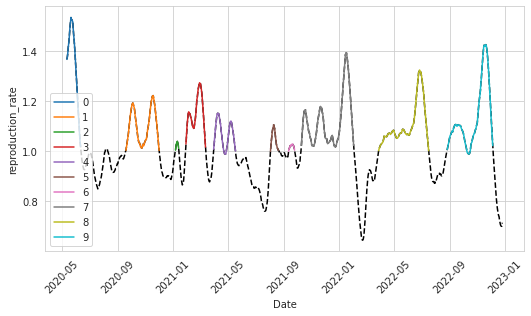

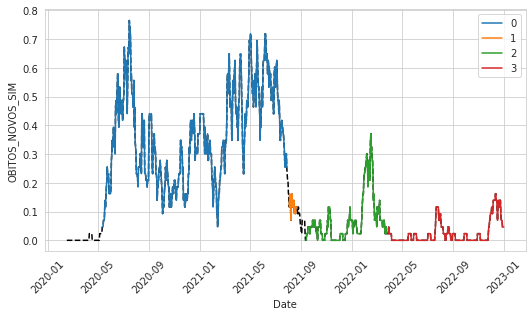

Porto Alegre


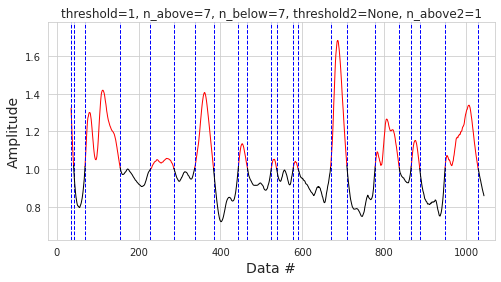

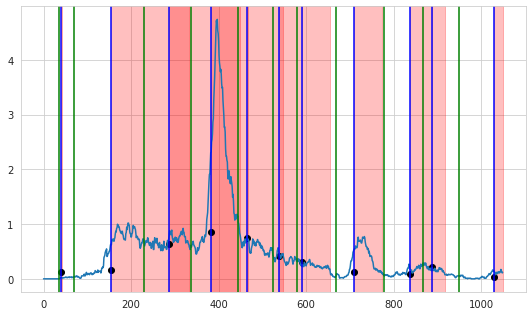

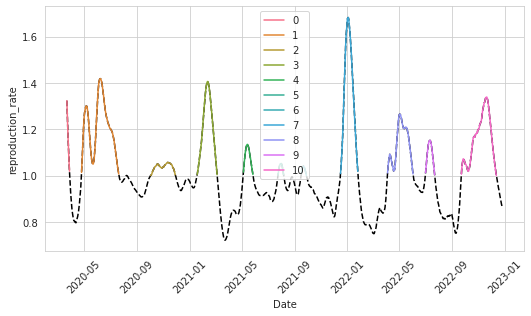

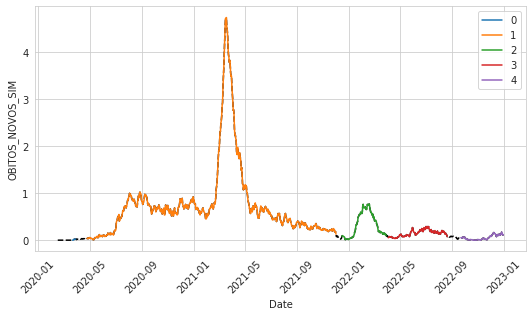

São Paulo


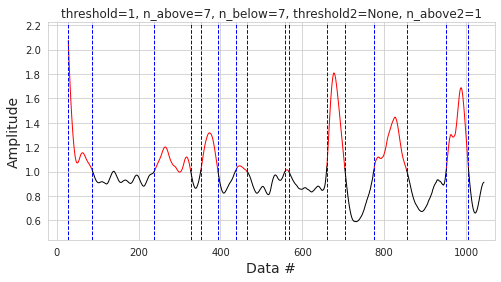

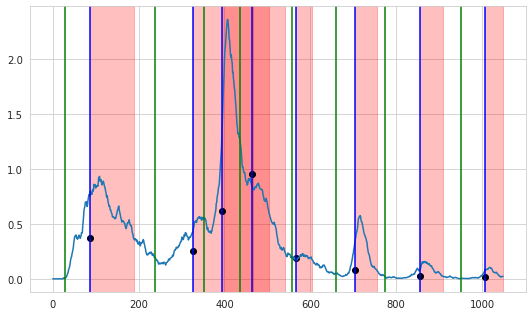

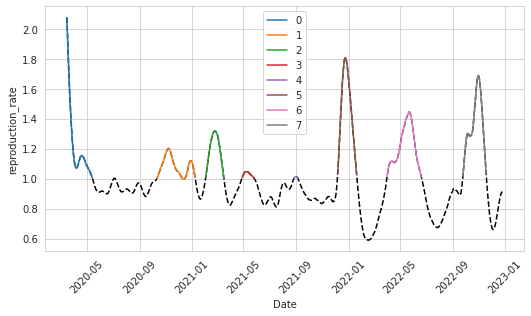

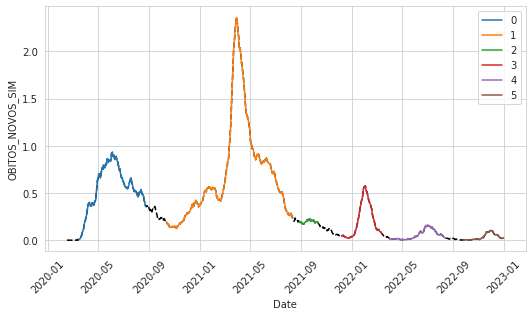

São Gonçalo


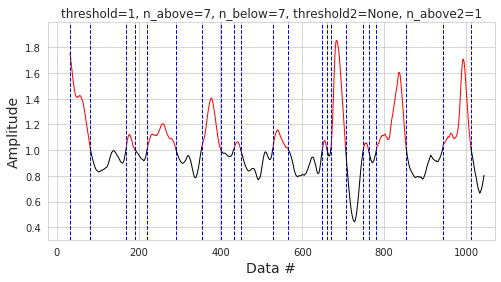

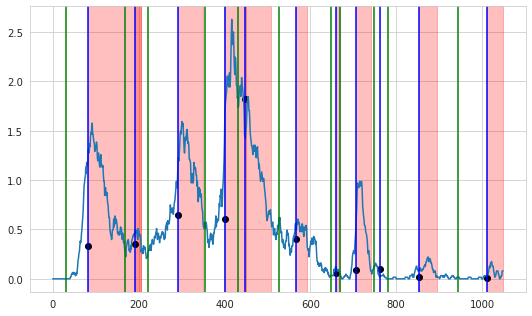

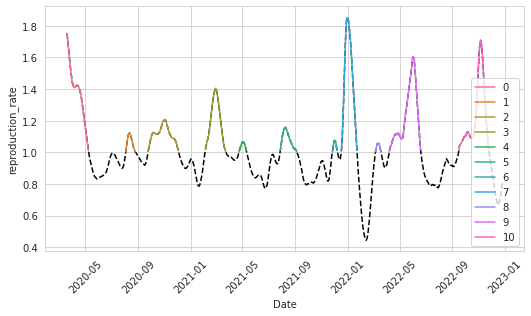

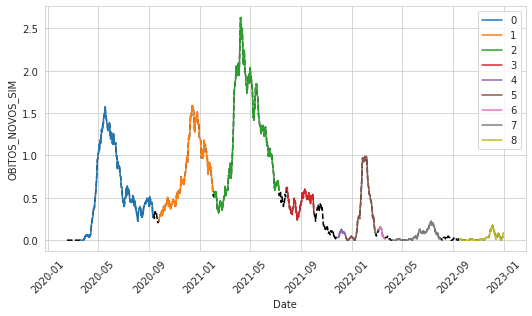

João Pessoa


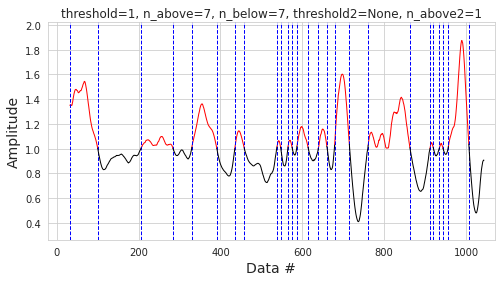

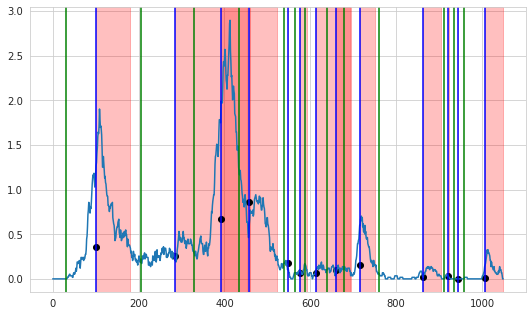

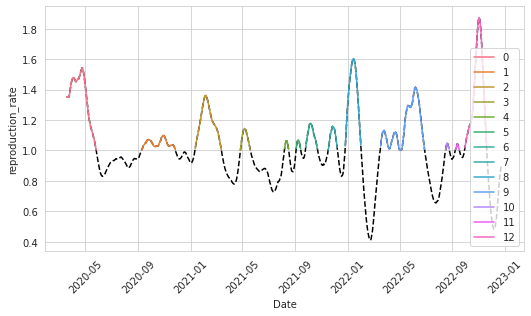

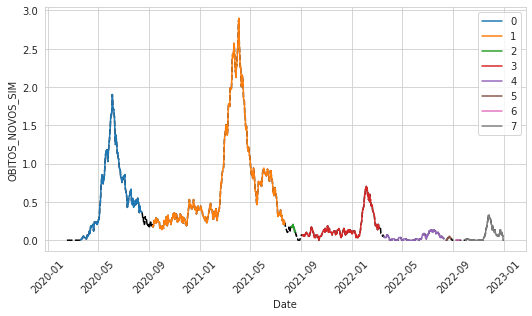

Jaboatão dos Guararapes


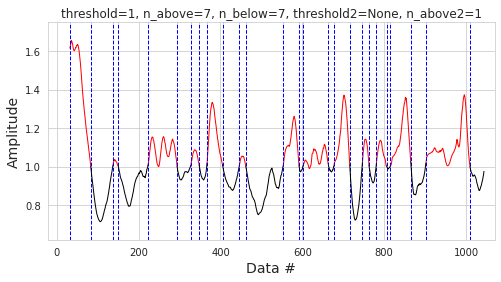

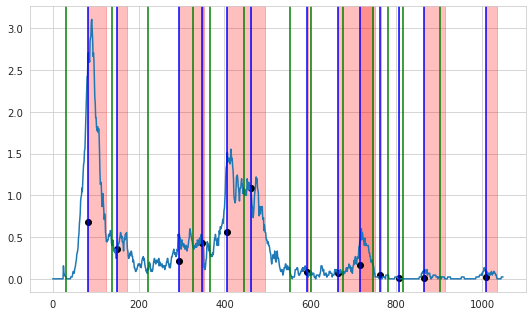

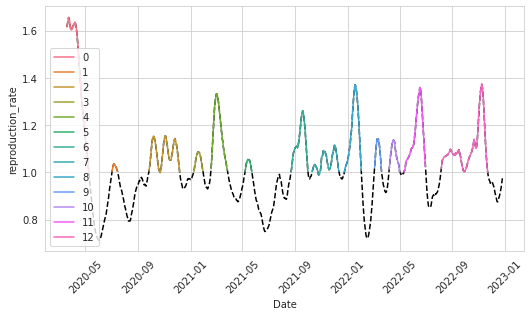

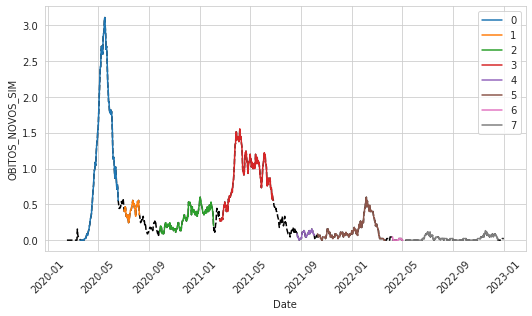

Guarulhos


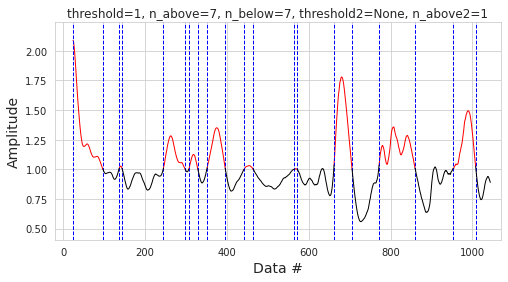

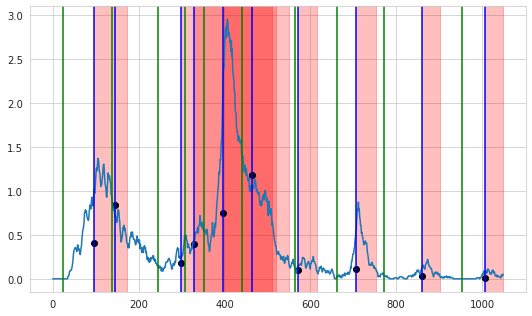

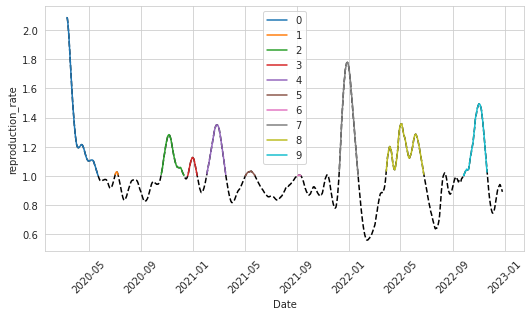

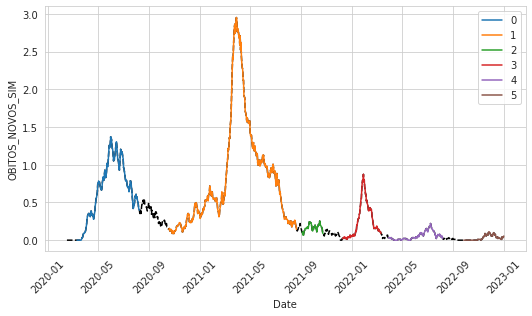

Cuiabá


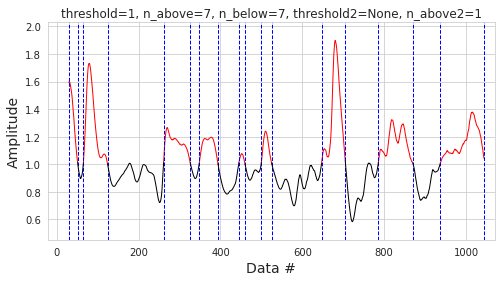

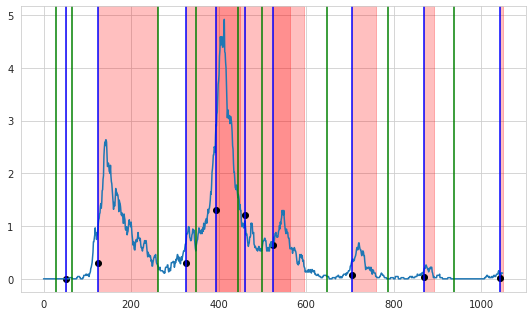

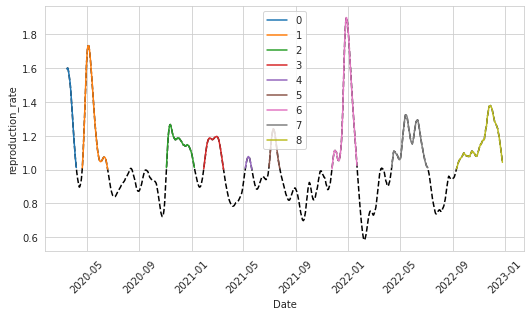

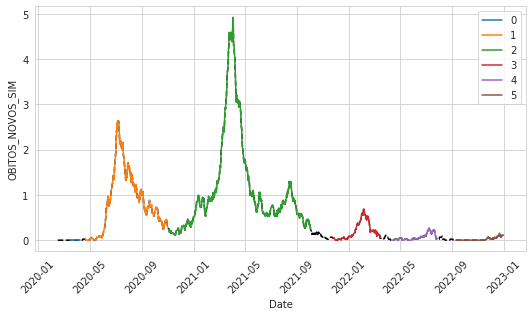

Fortaleza


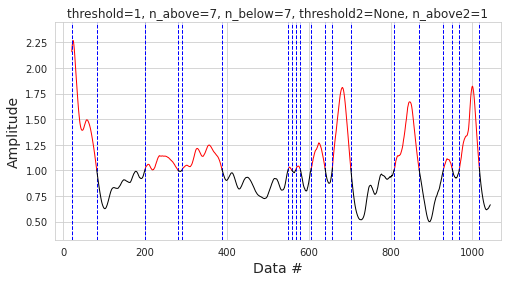

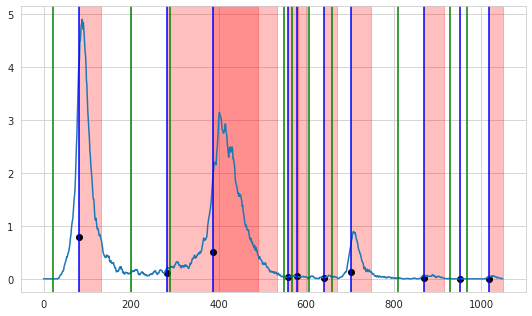

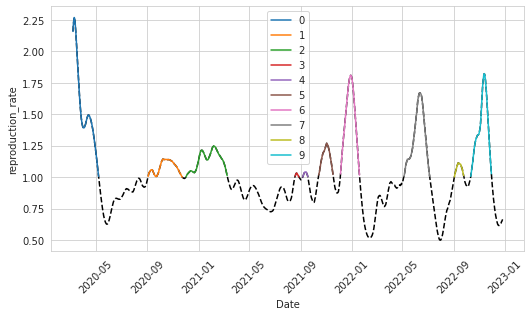

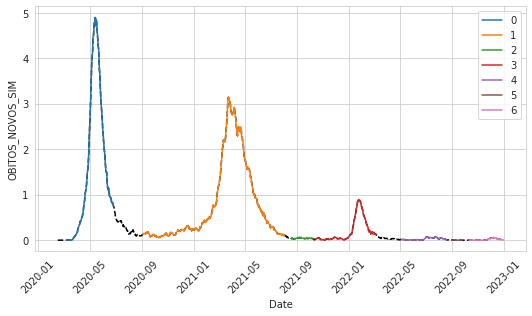

Serra


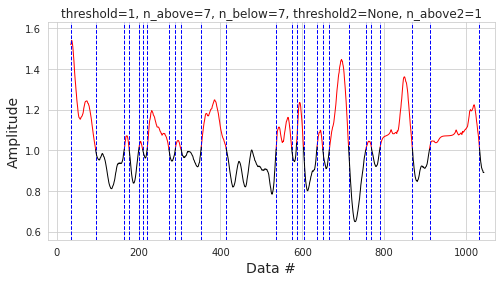

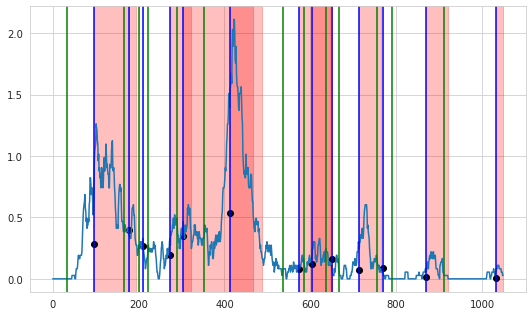

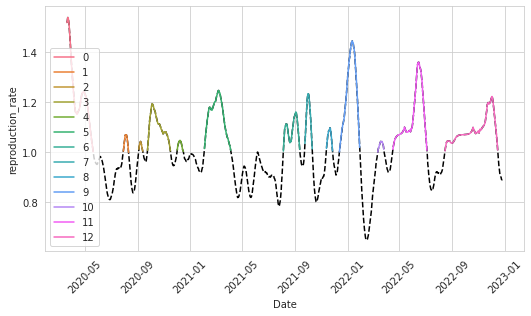

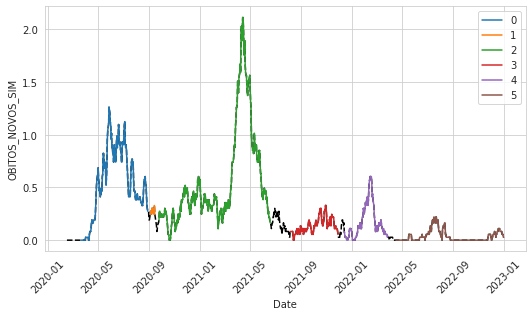

Osasco


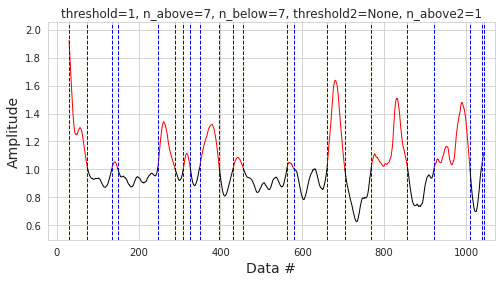

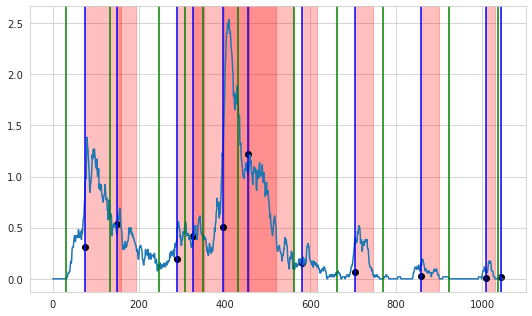

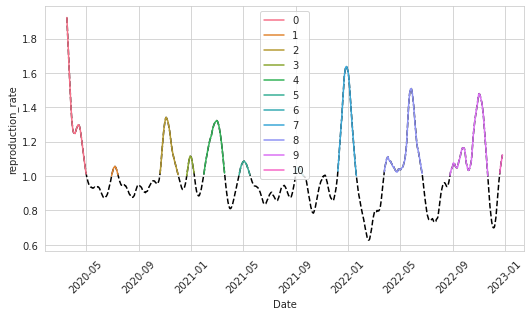

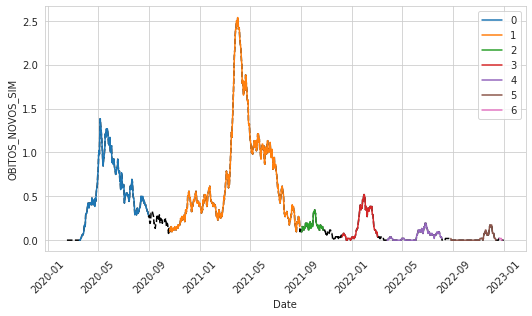

Belo Horizonte


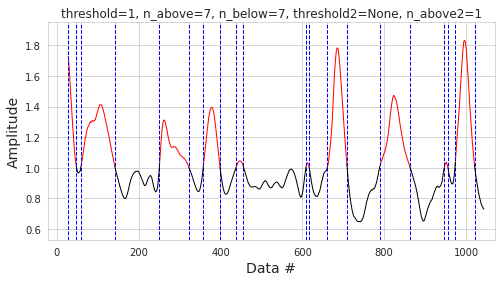

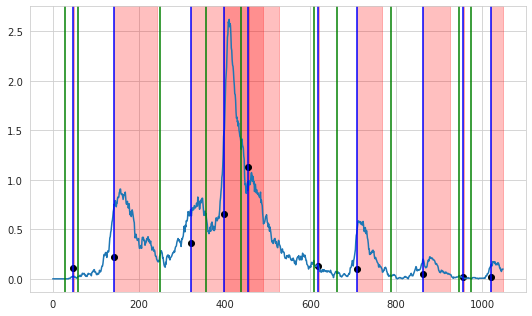

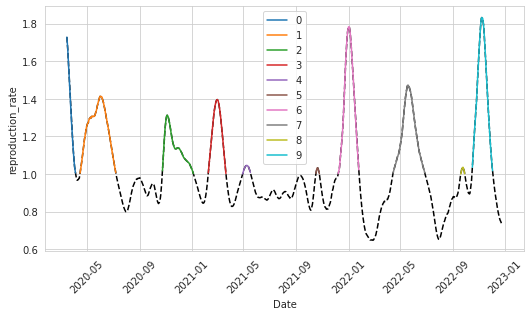

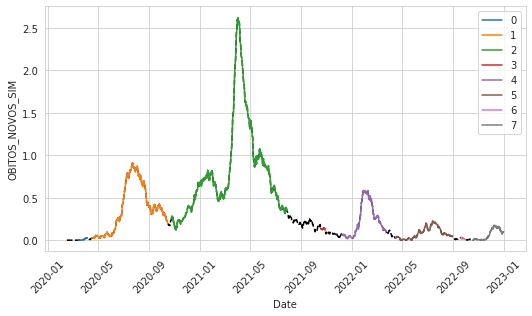

Belém


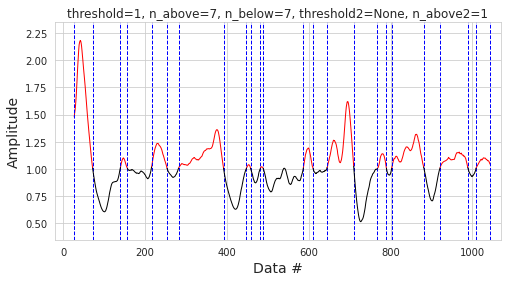

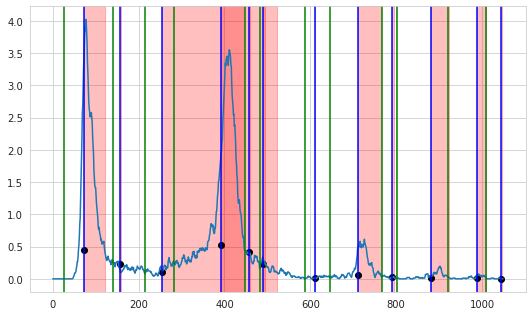

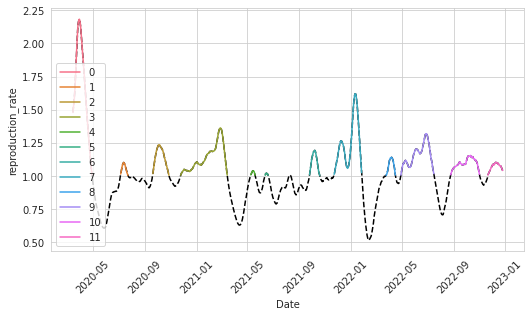

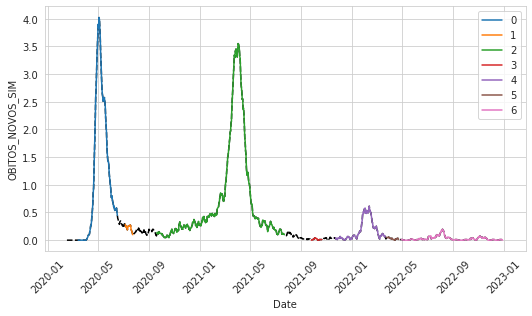

Brasília


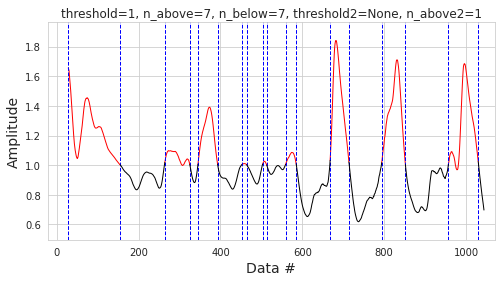

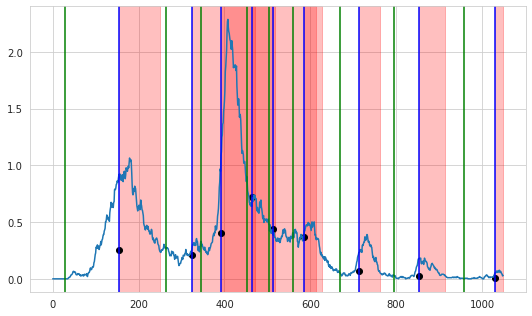

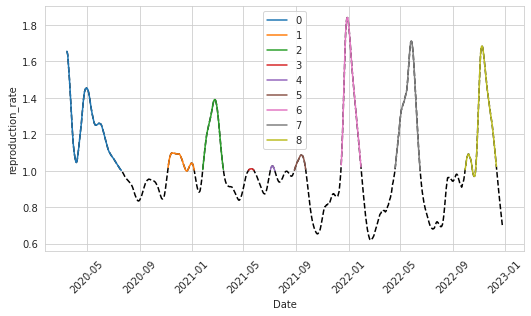

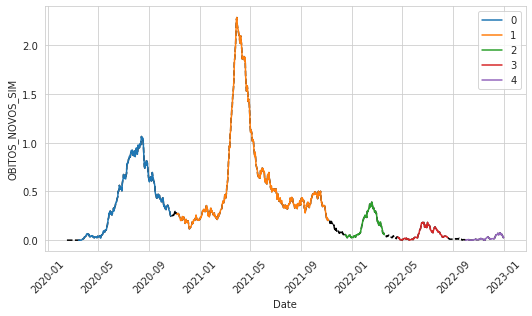

Maceió


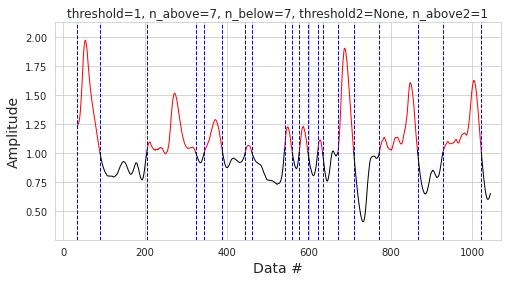

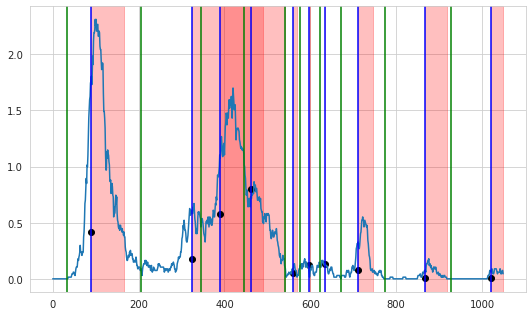

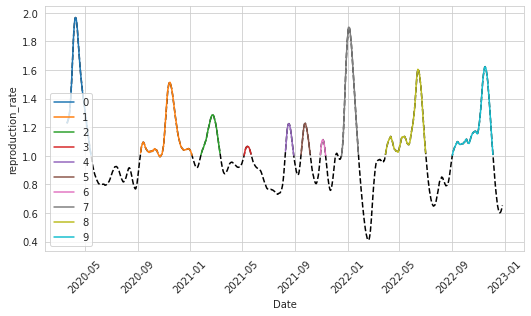

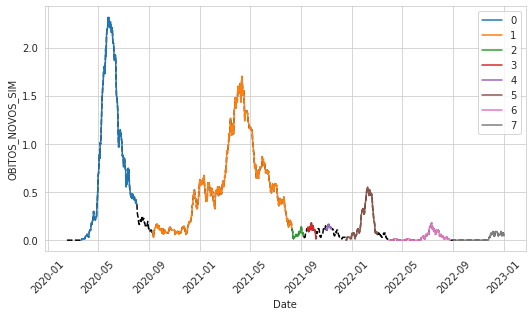

São José dos Campos


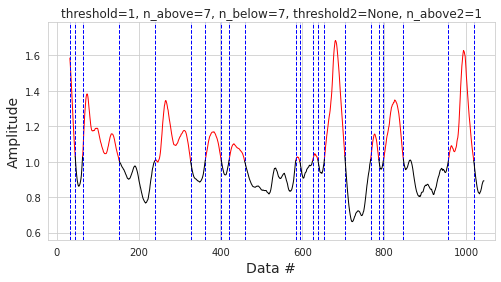

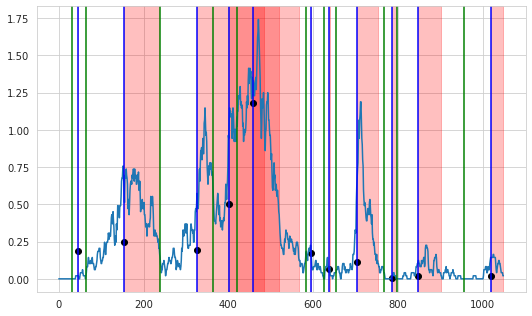

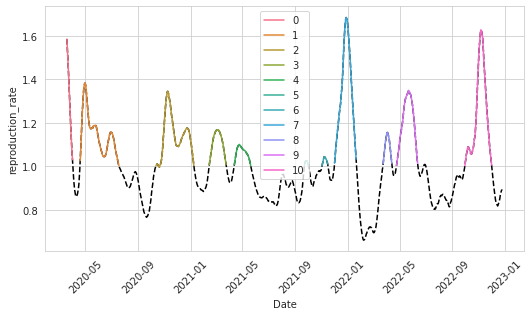

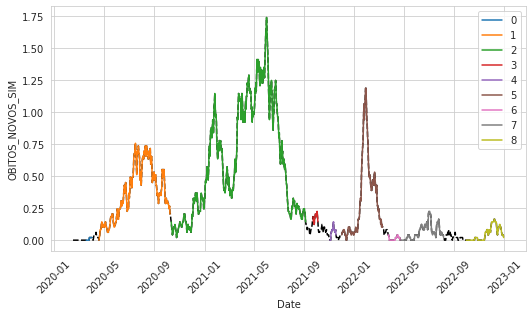

Joinville


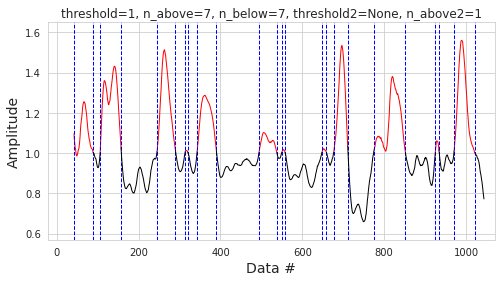

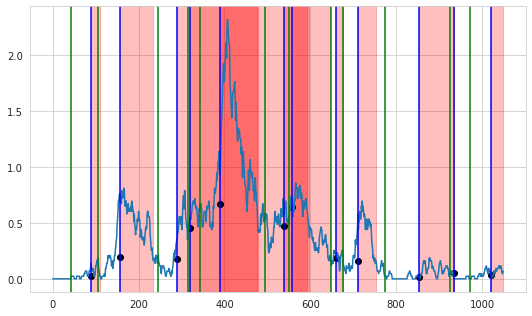

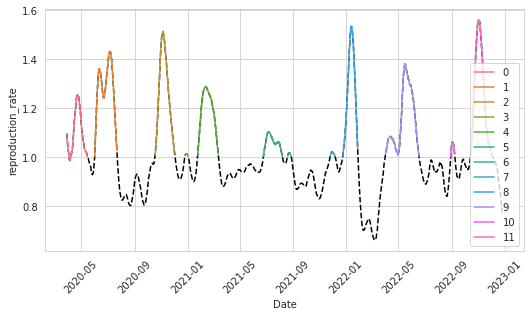

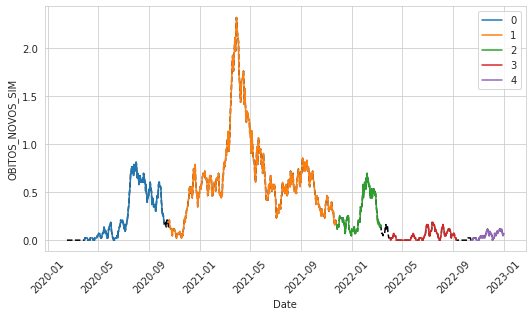

Santo André


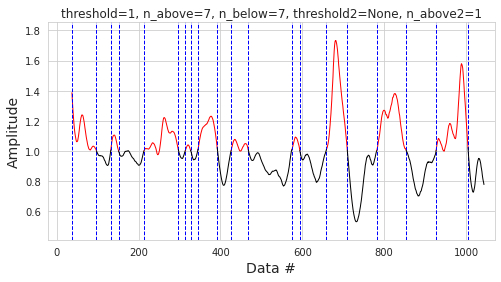

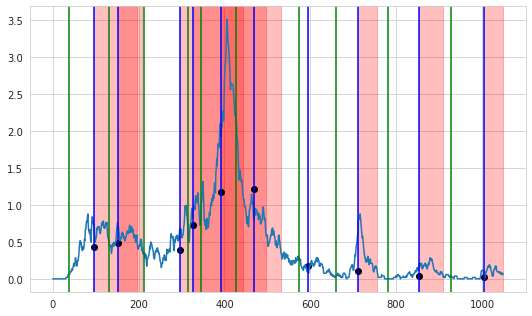

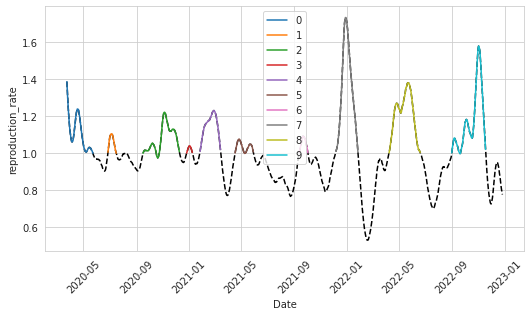

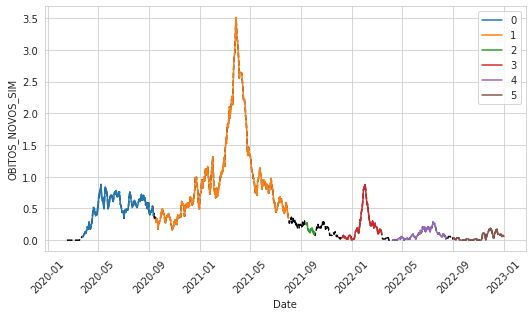

Rio de Janeiro


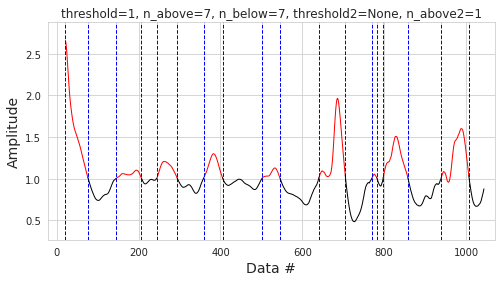

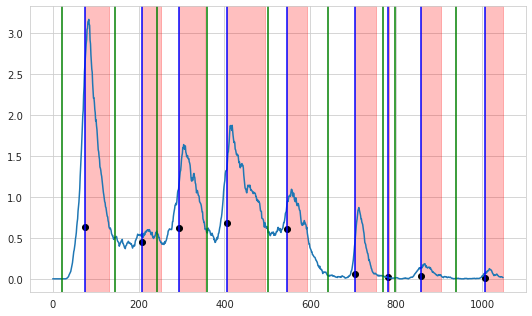

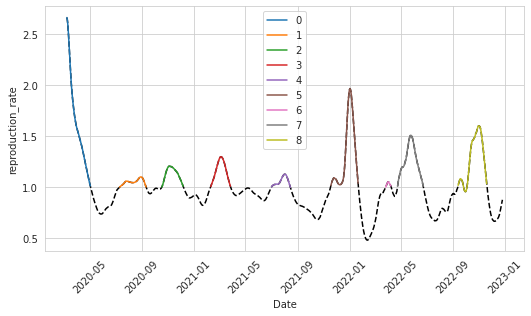

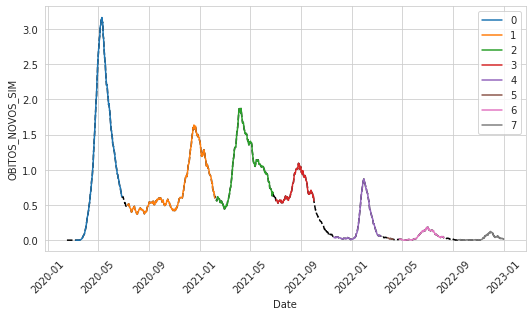

Juiz de Fora


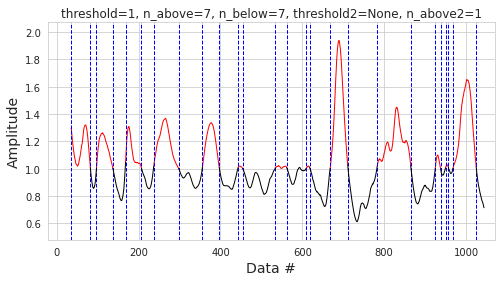

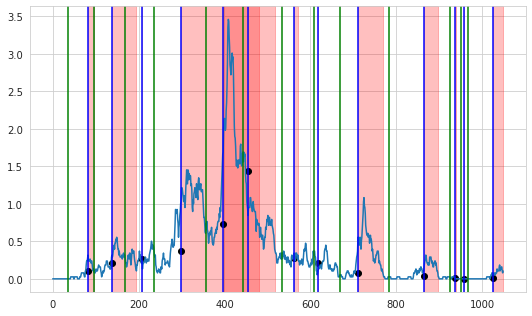

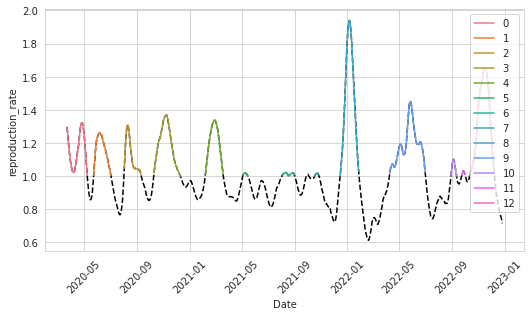

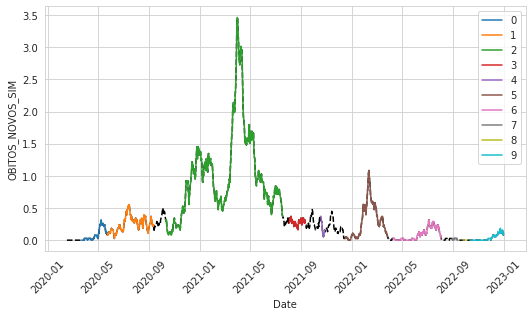

Londrina


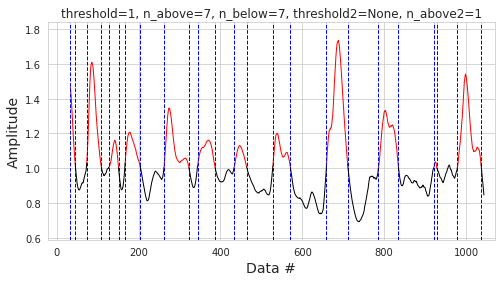

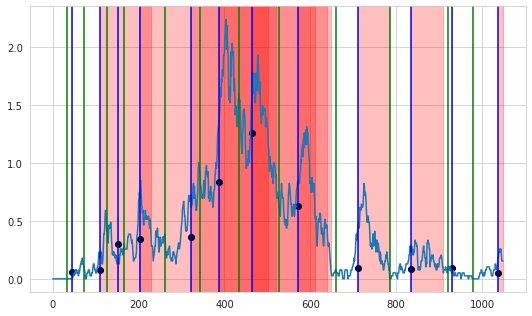

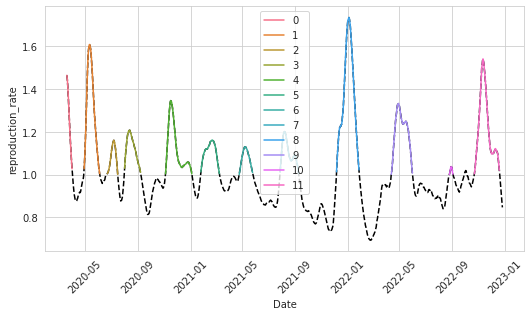

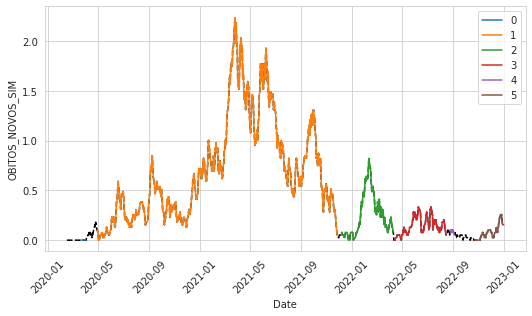

In [9]:
RT_COLUMN = 'NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA'

df_ts_epidemic_episodes = pd.DataFrame()

# for location in df_ts_sample[df_ts_sample.MUNICIPIO.isin(['Nova Iguaçu'])].CODIGO_MUNICIPIO_6.unique():
for location in df_ts_sample.CODIGO_MUNICIPIO_6.unique():
    df_temp = df_ts_sample[df_ts_sample.CODIGO_MUNICIPIO_6 == location]
    df_temp = df_temp.reset_index(drop=True)
    
    name_municipality = df_temp.MUNICIPIO.unique()[0] 
    print(name_municipality)
    
    onset_rt = detect_onset(df_temp[RT_COLUMN], threshold=1, n_above=7, n_below=7, show=True)
    plt.show()
    
    if (name_municipality in ['Uberlândia','Goiânia','Porto Alegre','Belo Horizonte','São José dos Campos','Juiz de Fora','Londrina']):
        ignore_end_of_outbreak = 0
    elif (name_municipality in ['Campo Grande', 'Curitiba', 'Duque de Caxias']):
        ignore_end_of_outbreak = 1 
    else:
        ignore_end_of_outbreak = None
    
    if(name_municipality in ['Cuiabá','Belo Horizonte', 'Juiz de Fora']):
        factor_threshold = {1: 1.5}
    elif(name_municipality in ['Nova Iguaçu']):
        factor_threshold = {1: 1.25, 2:1.25}
    elif(name_municipality in ['Campo Grande']):
        factor_threshold = {2: 0.25}
    elif(name_municipality in ['São Gonçalo']):
        factor_threshold = {2: 1.25}           
    elif(name_municipality in ['Joinville']):
        factor_threshold = {2: 1.5}                              
    else:
        factor_threshold = 1
    
    onset_deaths = detect_onset_deaths(df_temp.TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS.values, onset_rt, ignore_end_of_outbreak, factor_threshold)
    plt.show()
    
    epidemic_episodes = np.empty((0, 2))
    
    for i in range(len(onset_rt)):
        onset_rt_begin = onset_rt[i][0]
        onset_rt_end = onset_rt[i][1]
        days_onset_rt = onset_rt_end - onset_rt_begin
       
        onset_deaths_i = onset_deaths[(onset_deaths[:,0]>onset_rt_begin) & (onset_deaths[:,0]<=onset_rt_end)]
           
        onset_deaths_end = onset_deaths_i[-1][1]
        outbreak_end = onset_deaths_end                  
        
        outbreak_begin = onset_rt_begin
        outbreak = [outbreak_begin, outbreak_end]
        epidemic_episodes = np.append(epidemic_episodes, [outbreak], axis=0)    
        
    # Initialize the merged_outbreaks array with the first period from outbreaks
    merged_epidemic_episodes = [epidemic_episodes[0]]
    
    # Iterate through the rest of the outbreaks to merge contiguous periods
    for period in epidemic_episodes[1:]:
        last_merged_period = merged_epidemic_episodes[-1]
        
        if period[0] <= last_merged_period[1]:
            # Merge contiguous periods by updating the end time of the last merged period
            merged_epidemic_episodes[-1][1] = max(period[1], last_merged_period[1])
        else:
            # Append the non-contiguous period to the merged_outbreaks array
            merged_epidemic_episodes.append(period)
    
    # Convert the merged_outbreaks list to a numpy array
    merged_epidemic_episodes = np.array(merged_epidemic_episodes)
    
    for i in range(len(merged_epidemic_episodes)):
        df_temp.loc[merged_epidemic_episodes[i][0]:merged_epidemic_episodes[i][1], 'EPIDEMIC_EPISODE'] = str(i)
    for i in range(len(onset_rt)):
        df_temp.loc[onset_rt[i][0]:onset_rt[i][1],'ONSET_NUMERO_REPRODUCAO_EFETIVO_MEDIA'] = str(i)
    for i in range(len(onset_deaths)):
        df_temp.loc[onset_deaths[i][0]:onset_deaths[i][1],'ONSET_TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS'] = str(i)    
    
    # Initialize the plot
    plt.figure(figsize=(7.5, 4.5))
    
    # Plot the time series with different line colors for each outbreak
    sns.lineplot(data=df_temp, x='DATA', y=RT_COLUMN, color='black', linestyle='--')
    sns.lineplot(data=df_temp, x='DATA', y=RT_COLUMN, hue='ONSET_NUMERO_REPRODUCAO_EFETIVO_MEDIA')
    
    # Add title and labels
    plt.xlabel("Date")
    plt.ylabel("reproduction_rate")
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Display the legend
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    # Initialize the plot
    plt.figure(figsize=(7.5, 4.5))
    
    # Plot the time series with different line colors for each outbreak
    sns.lineplot(data=df_temp, x='DATA', y='TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS', color='black', linestyle='--')
    sns.lineplot(data=df_temp, x='DATA', y='TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS', hue='EPIDEMIC_EPISODE')
    
    # Add title and labels
    plt.xlabel("Date")
    plt.ylabel("OBITOS_NOVOS_SIM")
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Display the legend
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    df_ts_epidemic_episodes = df_ts_epidemic_episodes.append(df_temp, ignore_index=True)

## Saving data

In [10]:
df_ts_epidemic_episodes.to_csv('../data/df_ts_epidemic_episodes.csv')

In [11]:
df_ts_epidemic_episodes.head()

DATA  CODIGO_MUNICIPIO_6  NOVOS_CASOS_SRAG  OBITOS_NOVOS  OBITOS  \
0 2020-02-16              130260               0.0           0.0     0.0   
1 2020-02-17              130260               0.0           0.0     0.0   
2 2020-02-18              130260               0.0           0.0     0.0   
3 2020-02-19              130260               0.0           0.0     0.0   
4 2020-02-20              130260               0.0           0.0     0.0   

   OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS  TAXA_OBITOS_NOVOS  \
0                              0.0                0.0   
1                              0.0                0.0   
2                              0.0                0.0   
3                              0.0                0.0   
4                              0.0                0.0   

   TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS  TAXA_OBITOS  casosNovos  ...  \
0                                   0.0          0.0         0.0  ...   
1                                   0.0          0.0         0.0  ...   
2                                   0.0          0.0         0.0  ...   
3                                   0.0          0.0         0.0  ...   
4                                   0.0          0.0         0.0  ...   

   NUMERO_REPRODUCAO_EFETIVO_QUANTIL_0.975  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   NUMERO_REPRODUCAO_EFETIVO_ATRASADO_MEDIA  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

  NUMERO_REPRODUCAO_EFETIVO_ATRASADO_VARIANCIA  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

  NUMERO_REPRODUCAO_EFETIVO_ATRASADO_QUANTIL_0.025  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

  NUMERO_REPRODUCAO_EFETIVO_ATRASADO_MEDIANA  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  NUMERO_REPRODUCAO_EFETIVO_ATRASADO_QUANTIL_0.975  TAXA_FATALIDADE  \
0                                              NaN              NaN   
1                                              NaN              NaN   
2                                              NaN              NaN   
3                                              NaN              NaN   
4                                              NaN              NaN   

   EPIDEMIC_EPISODE  ONSET_NUMERO_REPRODUCAO_EFETIVO_MEDIA  \
0               NaN                                    NaN   
1               NaN                                    NaN   
2               NaN                                    NaN   
3               NaN                                    NaN   
4               NaN                                    NaN   

   ONSET_TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS  
0                                         NaN  
1                                         NaN  
2                                         NaN  
3                                         NaN  
4                                         NaN  

[5 rows x 36 columns]